In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Importing the Dataset
data = pd.read_csv('ifood_df.csv')

In [4]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Recency']])

In [5]:
# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)


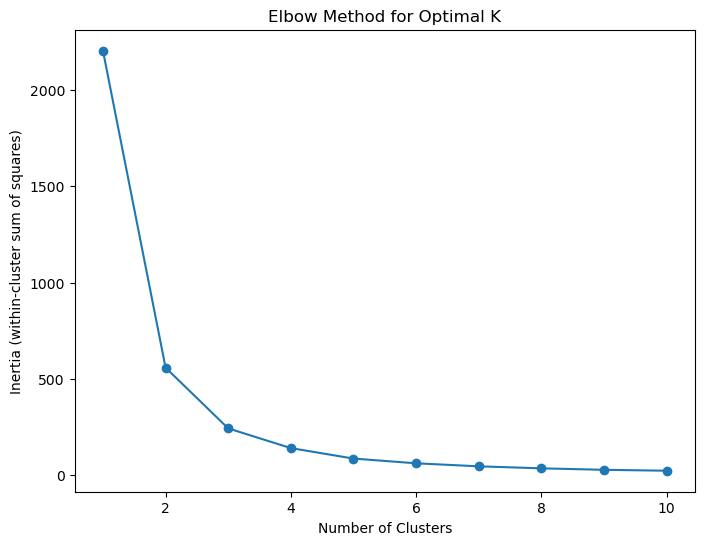

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [7]:
# Fit K-means with the chosen K
kmeans_final = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans_final.fit_predict(data_scaled)

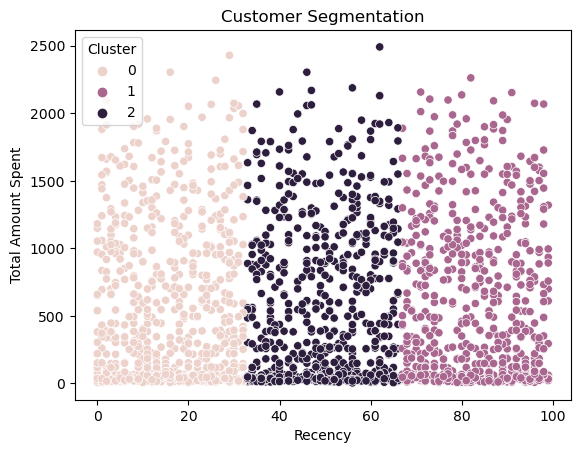

In [10]:
# Visualize the clusters
sns.scatterplot(x='Recency', y='MntTotal', hue='Cluster', data=data)
plt.title('Customer Segmentation')
plt.xlabel('Recency')
plt.ylabel('Total Amount Spent')
plt.show()

In [11]:
# Analyze the characteristics of each cluster
cluster_summary = data.groupby('Cluster').agg({
    'Recency': 'mean'
})
print(cluster_summary)

           Recency
Cluster           
0        15.941489
1        82.886555
2        49.926928
